## Loading Dataset

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving Acoustic_Extinguisher_Fire_Dataset.csv to Acoustic_Extinguisher_Fire_Dataset.csv


## **Dataset**

In [ ]:
import pandas as pd

data=pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")

In [ ]:
shape = data.shape
print("No of rows : "+ str(shape[0]))
print("No of cols : "+ str(shape[1]))

No of rows : 17442
No of cols : 7


In [ ]:
col = data.columns
print("Attributes of the dataset : ")
for i in col:
    print(i)

Attributes of the dataset : 
SIZE
FUEL
DISTANCE
DESIBEL
AIRFLOW
FREQUENCY
STATUS


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [ ]:
data.head(10)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1
8,1,gasoline,10,102,13.3,55,1
9,1,gasoline,10,93,15.4,52,1


In [ ]:
data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [ ]:
print("No of NULL values in each attribute : ")
print(data.isnull().sum())
print('Total number of NaN in the dataframe: ', data.isnull().sum().sum())

No of NULL values in each attribute : 
SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64
Total number of NaN in the dataframe:  0


In [ ]:
print(data.groupby("STATUS").size())

STATUS
0    8759
1    8683
dtype: int64


In [ ]:
X=data[(data["STATUS"]!=0)]
Y=data[(data["STATUS"]==0)]

In [ ]:
len(X)+len(Y)

17442

## **Loading the necessary Libraries**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import compose
from sklearn import impute
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_features = data.drop('STATUS', axis = 1)
data_target = data['STATUS']

In [ ]:
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, data_target,
                                                                                        test_size=0.2, random_state=42,
                                                                                        stratify=data_target)

In [ ]:
data_features_train.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
SIZE,1.000000,-0.001506,0.000147,-0.001470,0.001386
DISTANCE,-0.001506,1.000000,-0.228782,-0.707368,0.009838
DESIBEL,0.000147,-0.228782,1.000000,0.367942,0.563416
AIRFLOW,-0.001470,-0.707368,0.367942,1.000000,-0.220115
FREQUENCY,0.001386,0.009838,0.563416,-0.220115,1.000000


data_features_train.plot(kind="box",subplots=True,layout=(400,4)

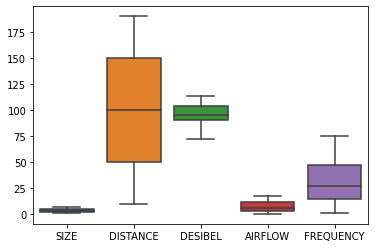

In [ ]:
sns.boxplot(data=data_features_train)

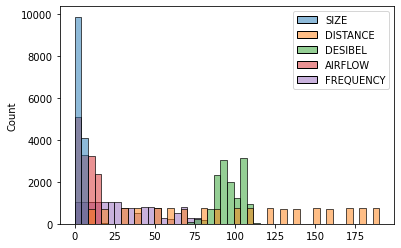

In [ ]:
sns.histplot(data=data_features_train)

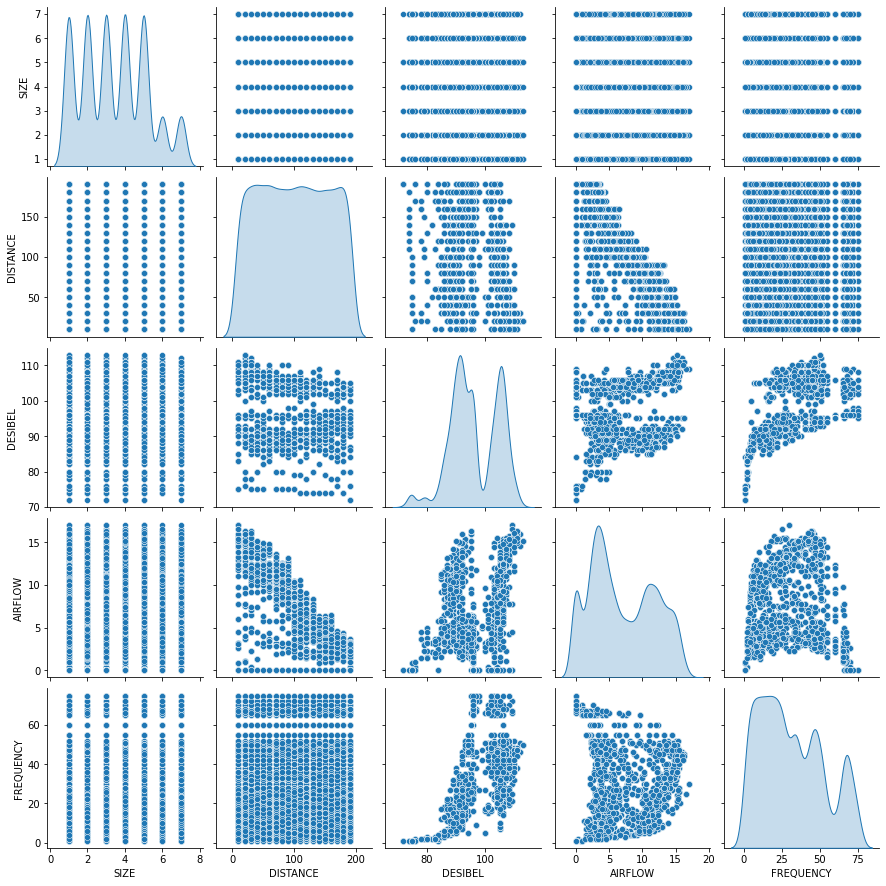

In [ ]:
sns.pairplot(data_features_train,diag_kind='kde',palette="Paired")

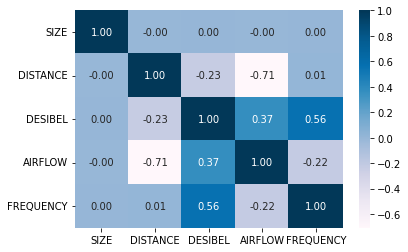

In [ ]:
sns.heatmap(data_features_train.corr(method='pearson'),annot=True,fmt='0.2f',cmap=plt.cm.PuBu)

## **Pre-Process DATA**

In [ ]:
numeric_columns = data_features_train.select_dtypes(include=['int64','float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy="constant", fill_value=0)),
    ('scaler', preprocessing.MinMaxScaler())
])
categorical_columns = data_features_train.select_dtypes(include=['object','bool','category']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='UKNOWN')),
    ('onehot', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

print("Number of numerical columns:", len(numeric_columns))
print("Number of categorical columns:", len(categorical_columns))
print("Total number of columns in the feature dataframe:", data_features_train.shape[1])

Number of numerical columns: 5
Number of categorical columns: 1
Total number of columns in the feature dataframe: 6


In [ ]:
preprocessor = compose.ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

array_features_train = preprocessor.fit_transform(data_features_train)
print("Transformed features from df_features_train.shape: {} to array_features_train.shape: {}".format(data_features_train.shape, array_features_train.shape))

Transformed features from df_features_train.shape: (13953, 6) to array_features_train.shape: (13953, 9)


In [ ]:
array_features_test = preprocessor.fit_transform(data_features_test)

In [ ]:
temp=pd.DataFrame(array_features_train)

In [ ]:
temp.head()

,0,1,2,3,4,5,6,7,8
0,0.333333,0.111111,0.853659,0.782353,0.689189,0.0,1.0,0.0,0.0
1,0.500000,0.388889,0.365854,0.452941,0.040541,0.0,0.0,0.0,1.0
2,0.000000,0.500000,0.780488,0.382353,0.283784,0.0,1.0,0.0,0.0
3,0.500000,0.555556,0.878049,0.458824,0.500000,0.0,1.0,0.0,0.0
4,0.666667,0.888889,0.682927,0.135294,0.675676,1.0,0.0,0.0,0.0


In [ ]:
array_target_train = data_target_train.ravel()
print("array_features_train.shape: {} array_target_train.shape: {}".format(array_features_train.shape, array_target_train.shape))

array_features_train.shape: (13953, 9) array_target_train.shape: (13953,)


## **ANN**

In [ ]:
# Define the baseline model for benchmarking
DEFAULT_LOSS = 'binary_crossentropy'
DEFAULT_METRICS = ['accuracy']
DEFAULT_OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.0001)
CLASSIFIER_ACTIVATION = 'sigmoid'
MAX_EPOCHS = 75
BATCH_SIZE = 32
def create_nn_model(input_param=array_features_train.shape[1],
                    layer1_nodes=100, layer2_nodes=100,
                    layer1_dropout=0.25, layer2_dropout=0.25,
                    classifier_activation=CLASSIFIER_ACTIVATION, loss_param=DEFAULT_LOSS,
                    opt_param=DEFAULT_OPTIMIZER, metrics_param=DEFAULT_METRICS):
    nn_model = keras.Sequential([
        keras.layers.Dense(layer1_nodes, input_shape=(input_param,), activation='relu'),
        keras.layers.Dropout(layer1_dropout),
        keras.layers.Dense(layer2_nodes, activation='relu'),
        keras.layers.Dropout(layer2_dropout),
        keras.layers.Dense(1, activation=classifier_activation)
    ])
    nn_model.compile(loss=loss_param, optimizer=opt_param, metrics=metrics_param)
    return nn_model

In [ ]:
import random
def reset_random(x=42):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [ ]:
N_FOLDS = 10
N_ITERATIONS = 1
results = list()
iteration = 0
cv = RepeatedKFold(n_splits=N_FOLDS, n_repeats=N_ITERATIONS, random_state=42)
for train_ix, val_ix in cv.split(array_features_train):
    print("here")
    feature_train, feature_validation = array_features_train[train_ix], array_features_train[val_ix]
    target_train, target_validation = array_target_train[train_ix], array_target_train[val_ix]
    reset_random()
    baseline_model = create_nn_model()
    baseline_model.fit(feature_train, target_train, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    model_metric = baseline_model.evaluate(feature_validation, target_validation, verbose=0)[1]
    iteration = iteration + 1
    print('Score from iteration %d >>> %.4f' % (iteration, model_metric))
    results.append(model_metric)
validation_score = np.mean(results)
validation_variance = np.std(results)

here
Score from iteration 1 >>> 0.9556
here
Score from iteration 2 >>> 0.9513
here
Score from iteration 3 >>> 0.9456
here
Score from iteration 4 >>> 0.9333
here
Score from iteration 5 >>> 0.9305
here
Score from iteration 6 >>> 0.9477
here
Score from iteration 7 >>> 0.9491
here
Score from iteration 8 >>> 0.9419
here
Score from iteration 9 >>> 0.9376
here
Score from iteration 10 >>> 0.9484


In [ ]:
print('Average model score from all iterations: %.4f (%.4f)' % (validation_score, validation_variance))

Average model score from all iterations: 0.9441 (0.0077)


In [ ]:
FINAL_OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.0001)
final_model = create_nn_model(opt_param=FINAL_OPTIMIZER)
final_model.fit(array_features_train, array_target_train, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, verbose=0)
final_model.summary()

In [ ]:
array_features_test = preprocessor.transform(data_features_test)
array_target_test = data_target_test.ravel()
print("array_features_test.shape: {} array_target_test.shape: {}".format(array_features_test.shape, array_target_test.shape))

array_features_test.shape: (3489, 9) array_target_test.shape: (3489,)


In [ ]:
test_predictions = (final_model.predict(array_features_test) > 0.5).astype("int32").ravel()
print(test_predictions)

[0 0 0 ... 1 1 0]


In [ ]:
print('Accuracy Score:', accuracy_score(array_target_test, test_predictions))
print('ROC/AUC Score:', roc_auc_score(array_target_test, test_predictions), '\n')
print(confusion_matrix(array_target_test, test_predictions), '\n')
print(classification_report(array_target_test, test_predictions))

## **K Nearest Neighbour**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(array_features_train, data_target_train)
model_knn.score(array_features_test, data_target_test) 

## **Random Forest**

In [ ]:
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=100, class_weight='balanced')
model.fit(array_features_train, data_target_train)
model.score(array_features_test, data_target_test) 

0.9661794210375466

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10)
scores = cross_val_score(RandomForestClassifier(random_state=42),array_features_test, array_target_test, cv = cv)
print(np.average(scores))

0.9452598557454795
